In [164]:
import pandas as pd
user_data = pd.read_csv('E:/pandas/practice_2_user_data.csv')
logs = pd.read_csv('E:/pandas/practice_2_logs.csv')

In [10]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [12]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [166]:
logs.platform.nunique

<bound method IndexOpsMixin.nunique of 0          phone
1          phone
2          phone
3          phone
4       computer
          ...   
4495    computer
4496       phone
4497       phone
4498       phone
4499       phone
Name: platform, Length: 4500, dtype: object>

In [168]:
successful_client = logs.groupby('client' , as_index = False).agg({'success':'sum'})
max_succes = successful_client['success'].max()
most_successful_client = successful_client[successful_client['success'] == max_succes]
most_successful_client

,client,success
468,12179,41
1120,28719,41
1426,36165,41
2095,52870,41
2468,61468,41
2469,61473,41
3141,78349,41
3300,82563,41
3712,92584,41


In [170]:
client_who_are_successful = most_successful_client.client.sort_index()
array_of_most_successful_client = client_who_are_successful.to_numpy()
client_string = ', '.join(map(str, array_of_most_successful_client))
print(client_string)

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584


In [126]:
logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

In [172]:
premium_client = user_data.merge(logs, how = 'inner', on = 'client')
premium_client.loc[premium_client.premium  == True].platform.value_counts().idxmax()

'phone'

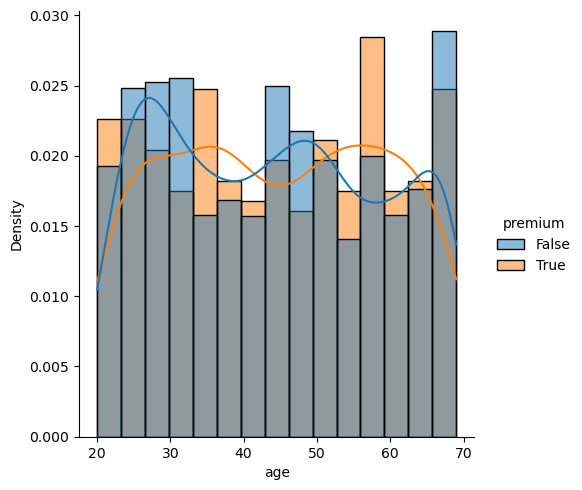

In [174]:
import seaborn as sns
sns.displot(data = premium_client, x = 'age', 
            hue = 'premium', 
            kde = True, 
            kind ='hist', 
            stat ='density', 
            common_norm = False, 
            bins = 15)
sns.despine()